In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
# from scipy.stats import ttest_indcou
from scipy.stats import fisher_exact
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# autoreload
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Import Dataset

In [3]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [4]:
import os
file_path = '../data/Cardiovascular_cleaned.csv'
print(os.path.exists(file_path))

True


# Hypothesis test

Null Hypothesis (H0): There is no significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

Alternative Hypothesis (Ha): There is a significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

# Mann-WhitneyU Test for all four columns

In [5]:
# Define the column names and categories
columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
categories = ['Yes', 'No']

# Define the alpha value
alpha = 0.05

# Loop through each column and perform the Mann-Whitney U test
for col in columns:
    for cat in categories:
        group1 = cardio[cardio['Heart_Disease'] == cat][col]
        group2 = cardio[cardio['Heart_Disease'] != cat][col]

        stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        
        print(f"\nMann-Whitney U test for {col} and Heart_Disease={cat}:")
        print(f"Mann-Whitney U statistic: {stat}")
        print(f"P-value: {p_value}")

        if p_value < alpha:
            print("The difference is statistically significant.")
        else:
            print("There is no significant difference.")


Mann-Whitney U test for Alcohol_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3006144385.5
P-value: 0.0
The difference is statistically significant.

Mann-Whitney U test for Alcohol_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 4082698007.5
P-value: 0.0
The difference is statistically significant.

Mann-Whitney U test for Fruit_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3374577681.0
P-value: 2.3590727367213727e-37
The difference is statistically significant.

Mann-Whitney U test for Fruit_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 3714264712.0
P-value: 2.3590727367213727e-37
The difference is statistically significant.

Mann-Whitney U test for Green_Vegetables_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3340434951.0
P-value: 3.777408343216292e-52
The difference is statistically significant.

Mann-Whitney U test for Green_Vegetables_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 3748407442.0
P

## Mann-WhitneyU test results in table format

In [9]:
# Results data
columns = ['Category', 'Heart_Disease', 'Mann_Whitney_U', 'P_Value']
data = [
    ['Alcohol_Consumption', 'Yes', 3006144385.5, 0.0],
    #['Alcohol_Consumption', 'No', 4082698007.5, 0.0],
    ['Fruit_Consumption', 'Yes', 3374577681.0, 2.3590727367213727e-37],
    #['Fruit_Consumption', 'No', 3714264712.0, 2.3590727367213727e-37],
    ['Green_Vegetables_Consumption', 'Yes', 3340434951.0, 3.777408343216292e-52],
    #['Green_Vegetables_Consumption', 'No', 3748407442.0, 3.777408343216292e-52],
    ['FriedPotato_Consumption', 'Yes', 3368543401.5, 1.8633472341292425e-39],
    #['FriedPotato_Consumption', 'No', 3720298991.5, 1.8633472341292425e-39]
]

# Create a DataFrame
result_df = pd.DataFrame(data, columns=columns)

# Display the table
print(result_df)

# result_df.hist(bins=100, figsize = [20, 10])

                       Category Heart_Disease  Mann_Whitney_U       P_Value
0           Alcohol_Consumption           Yes    3.006144e+09  0.000000e+00
1             Fruit_Consumption           Yes    3.374578e+09  2.359073e-37
2  Green_Vegetables_Consumption           Yes    3.340435e+09  3.777408e-52
3       FriedPotato_Consumption           Yes    3.368543e+09  1.863347e-39


For the above table: 
The Mann-Whitney U statistic is a test statistic from the Mann-Whitney U test. It measures the rank-sum difference between the two groups. The larger the U value, the more evidence there is of a difference between the distributions of the two groups. It is used in hypothesis testing to calculate the probability of observing such differences if the null hypothesis (no difference between the groups) is true.

the Mann-Whitney U test results indicate that there are very large and highly statistically significant differences in consumption levels between individuals with heart disease and those without heart disease. This suggests that the consumption patterns for Alcohol, Fruit, Green Vegetables, and Fried Potatoes differ significantly between the two groups.

# I reject my H null based on these results

Graphs

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

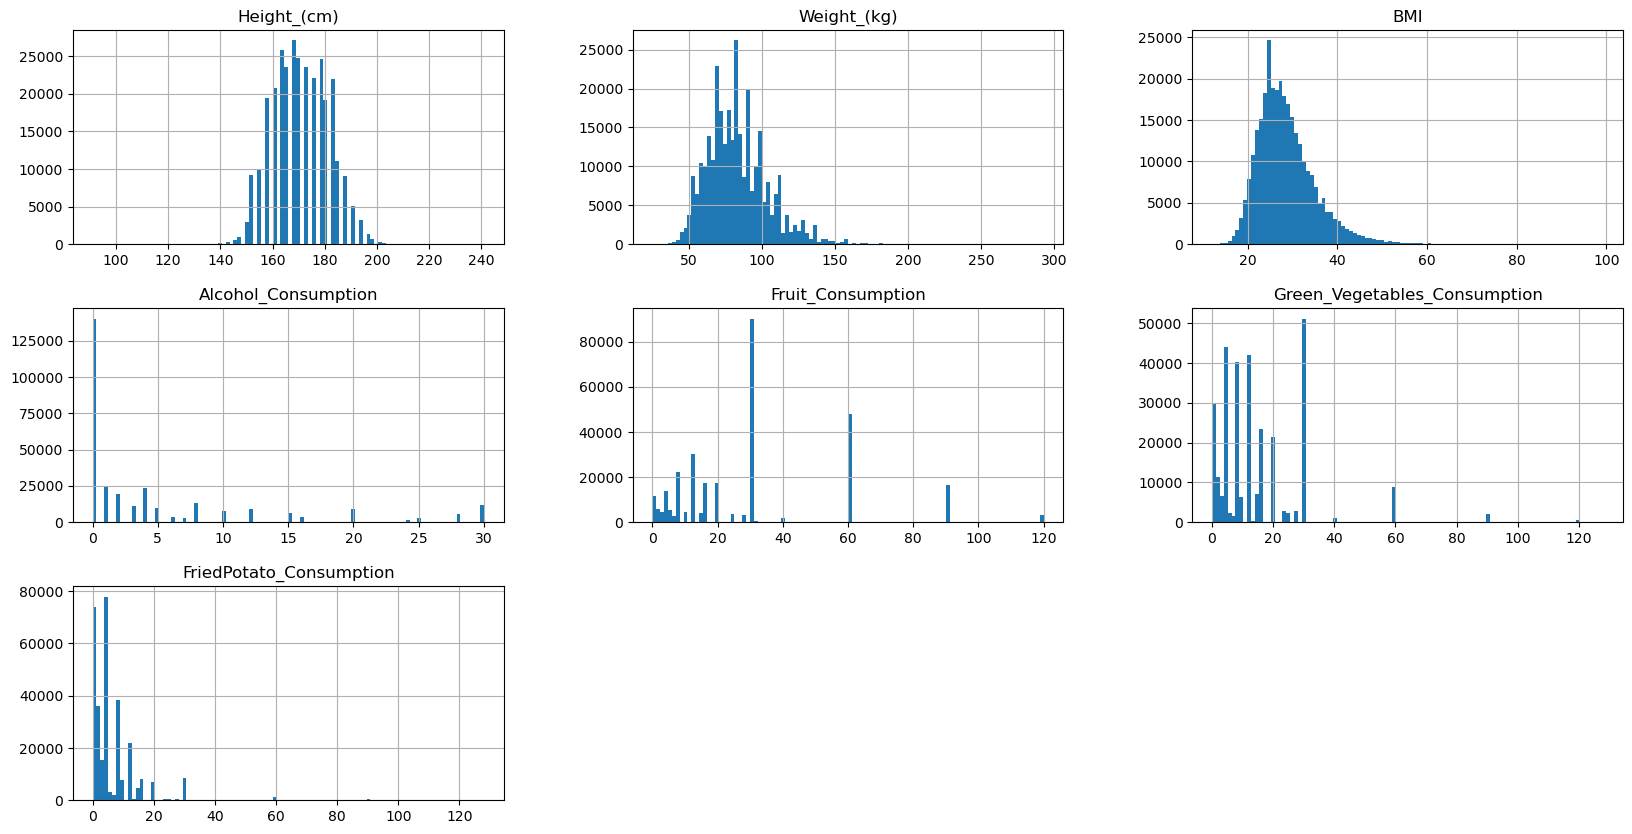

In [10]:
cardio.hist(bins=100, figsize = [20, 10])

## Consumption Features

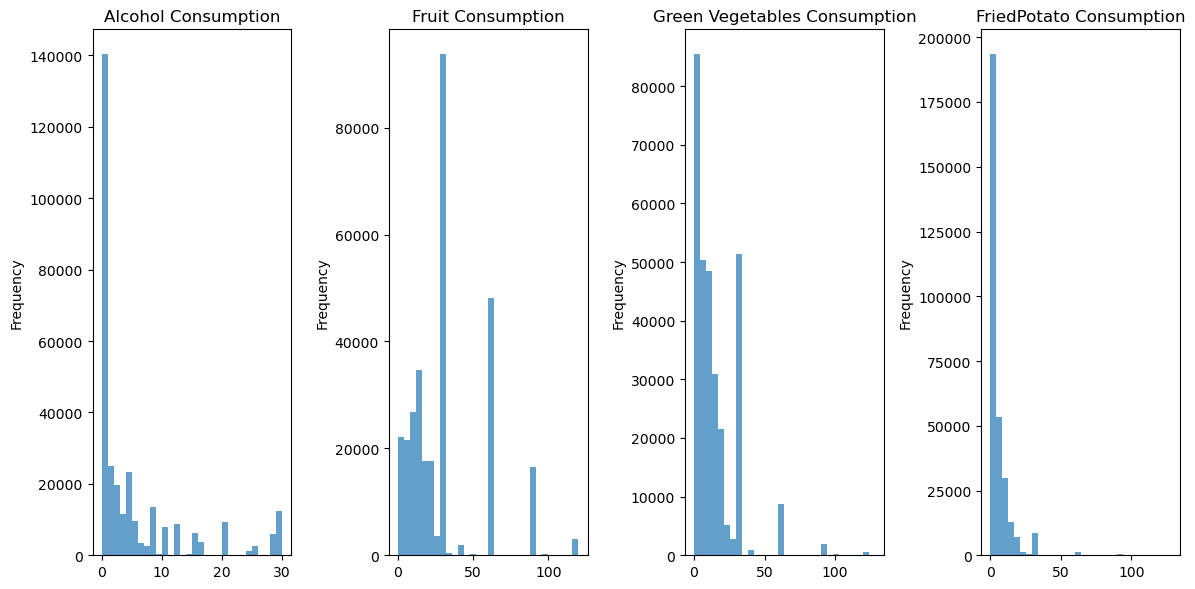

In [11]:
# Select the columns you want to plot
columns_to_plot = ["Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

# Create a single figure to hold all the histograms
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Loop through each column and plot the histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    plt.hist(cardio[column], bins=30, alpha=0.7)
    # plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.title(column.replace("_", " "))  # Replace underscores with spaces in the title

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

## Heart Disease only

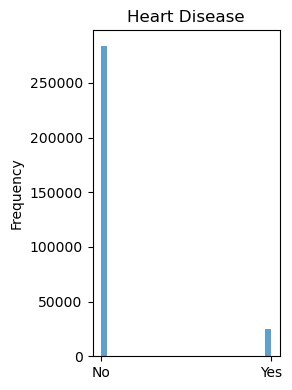

In [12]:
# Select the columns you want to plot
columns_to_plot = ["Heart_Disease"]

# Create a single figure to hold all the histograms
plt.figure(figsize=(3, 4))  # Adjust the figure size if needed

# Loop through each column and plot the histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    plt.hist(cardio[column], bins=30, alpha=0.7)
    # plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.title(column.replace("_", " "))  # Replace underscores with spaces in the title

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

## Counts of Categories by Heart Disease

<Figure size 1000x600 with 0 Axes>

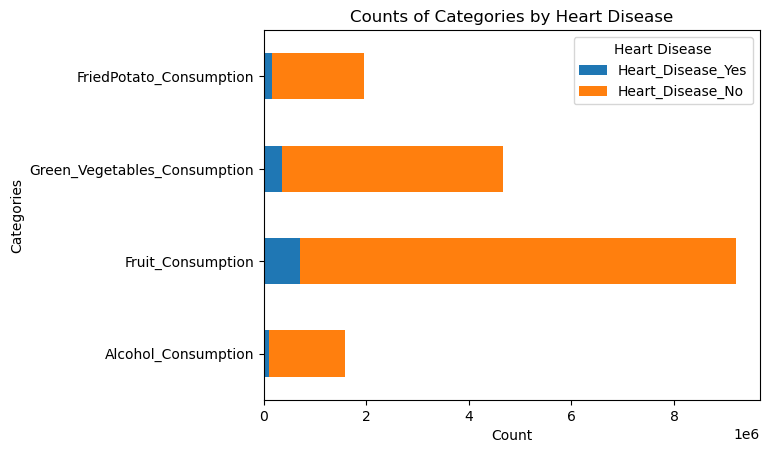

In [14]:
# Select the columns of interest and group by Heart_Disease
columns_of_interest = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
grouped_data = cardio.groupby('Heart_Disease')[columns_of_interest].sum()

# Separate data for Heart_Disease Yes and No
heart_disease_yes = cardio[cardio['Heart_Disease'] == 'Yes'][columns_of_interest].sum()
heart_disease_no = cardio[cardio['Heart_Disease'] == 'No'][columns_of_interest].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Heart_Disease_Yes': heart_disease_yes, 'Heart_Disease_No': heart_disease_no})

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the stacked horizontal bar chart
plot_data.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Counts of Categories by Heart Disease')
plt.legend(title='Heart Disease', loc='upper right')

plt.show()

## Distribution of Categories by Heart Disease

<Figure size 1000x600 with 0 Axes>

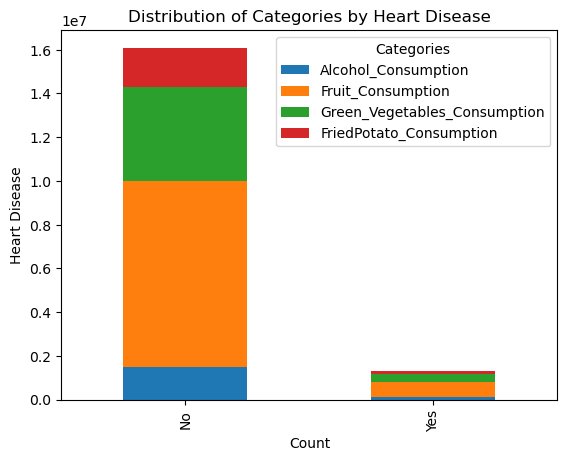

In [15]:
# Select the columns of interest and group by Heart_Disease
columns_of_interest = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
grouped_data = cardio.groupby('Heart_Disease')[columns_of_interest].sum()

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the stacked horizontal bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Count')
plt.ylabel('Heart Disease')
plt.title('Distribution of Categories by Heart Disease')
plt.legend(title='Categories', loc='upper right')

plt.show()